<Body>   
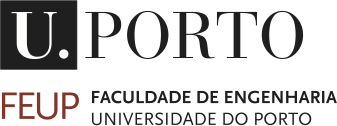   
<h1> <b>Computer Vision 2022/2023 </b> </h1>
<p><b>João Henrique Torres Santos, Thaidy Deguchi </b> (up201806590@edu.fe.up.pt, up201802575@edu.fe.up.pt )</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

# **Assignment 1**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/Shareddrives/VC/CV_Assig_1.zip


Archive:  /content/gdrive/Shareddrives/VC/CV_Assig_1.zip
   creating: WhiteBackground/
  inflating: WhiteBackground/calib_img 0.png  
  inflating: WhiteBackground/calib_img 1.png  
  inflating: WhiteBackground/calib_img 2.png  
  inflating: WhiteBackground/calib_img 3.png  
  inflating: WhiteBackground/extrinsic.png  
   creating: GreyBackground/
  inflating: GreyBackground/calib_img 0.png  
  inflating: GreyBackground/calib_img 1.png  
  inflating: GreyBackground/calib_img 2.png  
  inflating: GreyBackground/calib_img 3.png  
  inflating: GreyBackground/calib_img 4.png  
  inflating: GreyBackground/calib_img 5.png  
  inflating: GreyBackground/extrinsic.png  
   creating: IntrinsicCalibration/
  inflating: IntrinsicCalibration/calib_img 0.png  
  inflating: IntrinsicCalibration/calib_img 1.png  
  inflating: IntrinsicCalibration/calib_img 10.png  
  inflating: IntrinsicCalibration/calib_img 11.png  
  inflating: IntrinsicCalibration/calib_img 12.png  
  inflating: IntrinsicCalibration

## Imports

Import all the librarys needed


In [ ]:
import numpy as np 
import cv2  # computer vision basic bib
from google.colab.patches import cv2_imshow # for image display since cv2.imshow crashes the Colab
import matplotlib.pylab as plt #plot
import glob # for the calibration and img reading


## **Exercise A**




In [ ]:
# In the below line of code, it searches for the images folder, once it enters 
# the images folder it opens files having images since we have directed the function to do so by using *.png.


images = glob.glob('/content/IntrinsicCalibration/*.png')

objp = np.zeros((4*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:4].T.reshape(-1,2)

objpoints = []
imgpoints = []

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#iterates through the images
for image in images:

    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7, 4), None)

    if ret == True:
     objpoints.append(objp)
     corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
     imgpoints.append(corners)
     cv2.drawChessboardCorners(img, (7, 4), corners2, ret)
     
     plt.figure(figsize=(18,19))
     plt.subplot(221)
     plt.imshow(img)
     plt.title('Calibration')
     plt.show()






Output hidden; open in https://colab.research.google.com to view.

In [ ]:
###############################################
###This cell make the undistortion of images###
###############################################

img2undst = glob.glob('/content/WhiteBackground/*.png')
i = 0
for img in img2undst:
  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

  img = cv2.imread(img)
  h,  w = img.shape[:2]
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

  # undistort
  dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
  # crop the image
  x, y, w, h = roi
  dst = dst[y:y+h, x:x+w]
  name = str(i)
  cv2.imwrite('/content/gdrive/Shareddrives/VC/img_calibrated_white/' + name + '_calib_img.png', dst)
  i += 1

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(18,19))
  plt.subplot(221)
  plt.imshow(img)
  plt.title('Original')

  plt.subplot(222)
  plt.imshow(dst)
  plt.title('Undistorced')
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

## **Exercise B**




In [ ]:
####################################################
###Calc of the extrinsic parameters of the camera###
####################################################
print("####### Extrinsic Matrix Rotational Values ######\n")
print(rvecs, "\n")

print("####### Extrinsic Matrix Position Values #######\n")
print(tvecs, "\n")

####### Extrinsic Matrix Rotational Values ######

(array([[-0.07693935],
       [-0.07315741],
       [ 0.41931372]]), array([[-0.55794198],
       [ 0.03657685],
       [ 0.03096975]]), array([[-0.01686563],
       [ 0.00287926],
       [ 0.03782066]]), array([[ 0.99949197],
       [ 0.18350714],
       [-1.42428384]]), array([[0.00029202],
       [0.01210273],
       [0.11870008]]), array([[0.23806479],
       [0.39869753],
       [0.01041992]]), array([[-0.09330714],
       [ 0.48141824],
       [-3.06162482]]), array([[ 0.70180127],
       [ 0.20346833],
       [-0.47397021]]), array([[0.23441746],
       [0.35387025],
       [0.06428654]]), array([[-0.41023037],
       [ 0.03601495],
       [ 2.444915  ]]), array([[-0.53519998],
       [ 0.1490018 ],
       [ 1.456533  ]]), array([[ 0.05286781],
       [-0.23466999],
       [ 0.03257019]]), array([[-0.66753056],
       [ 0.15933622],
       [ 1.32953404]]), array([[ 0.70292953],
       [ 0.22198069],
       [-0.50026671]]), array

## **Exercise C - I, II**

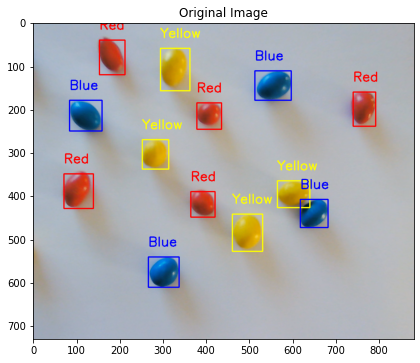

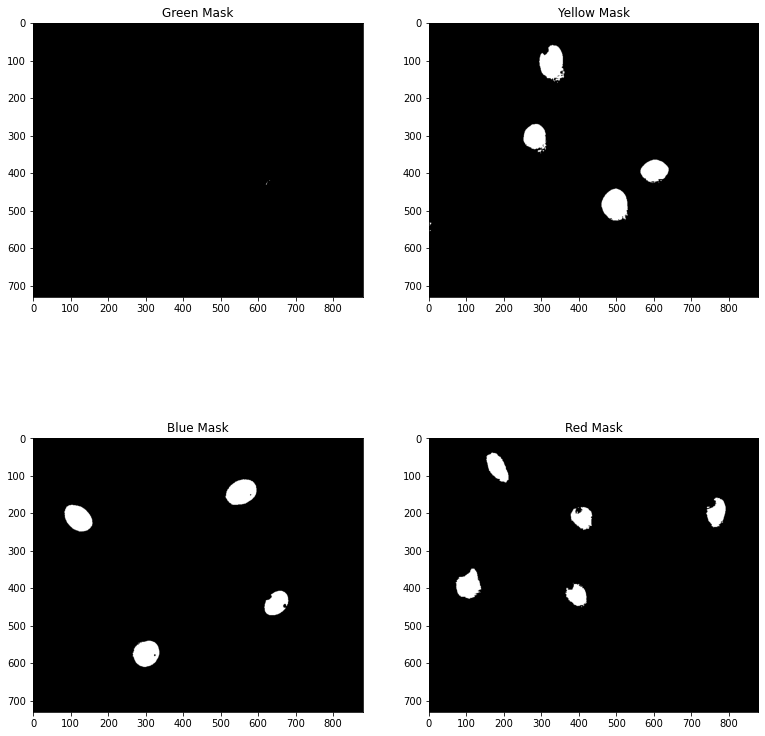

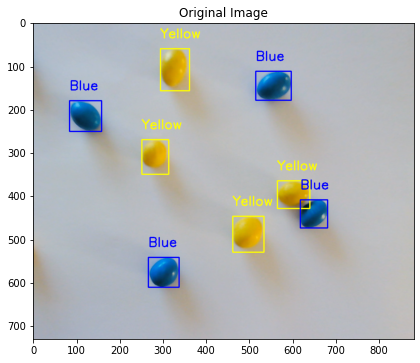

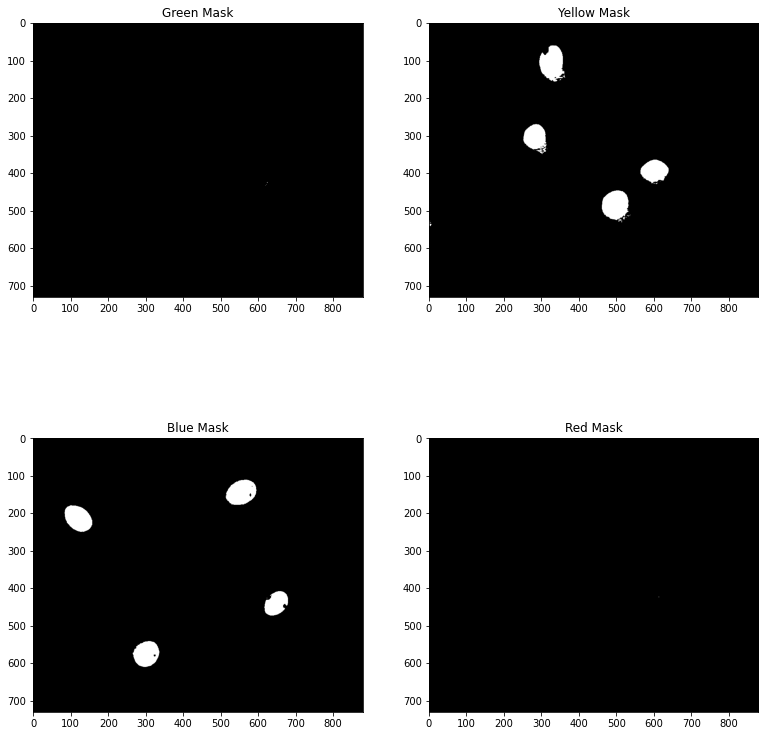

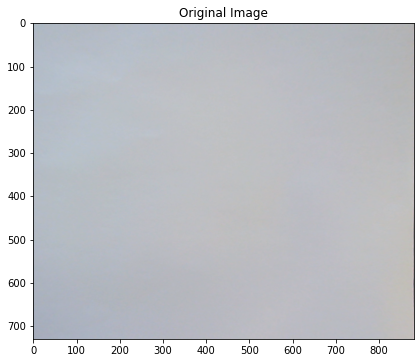

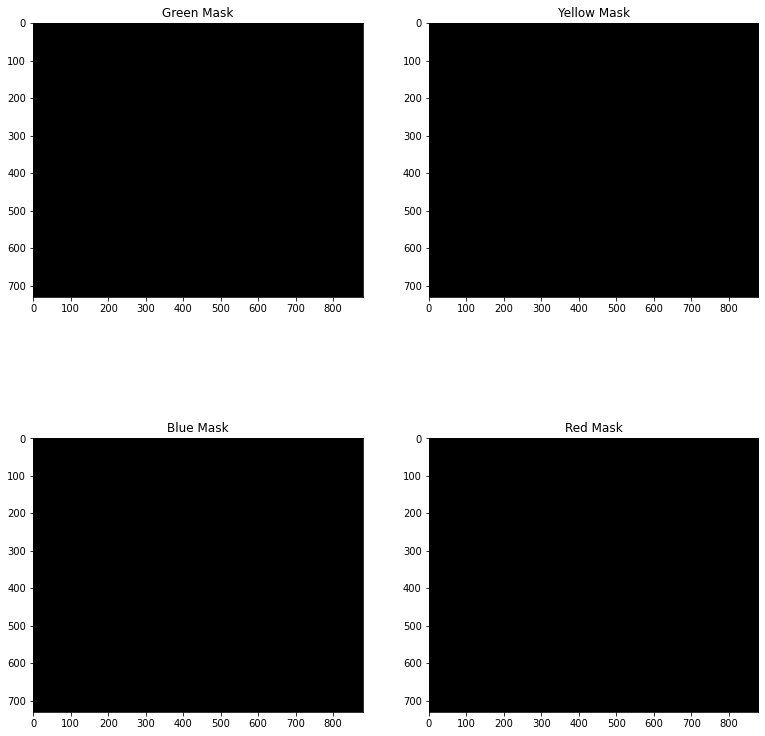

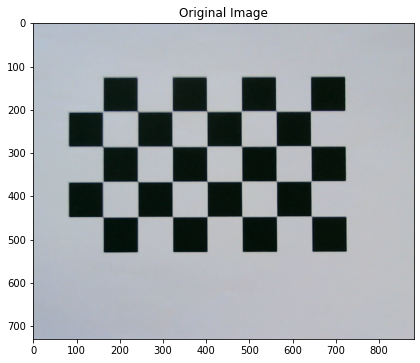

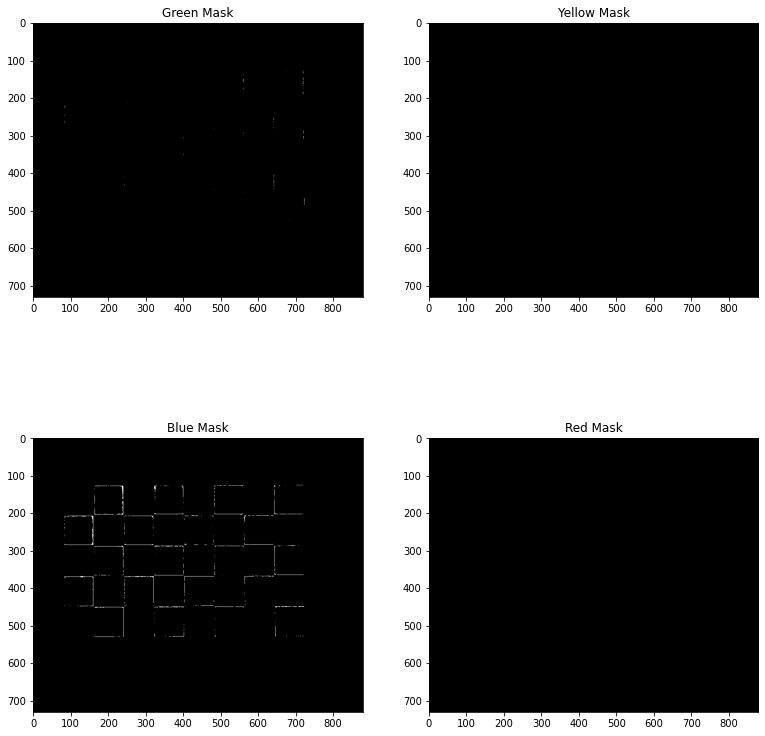

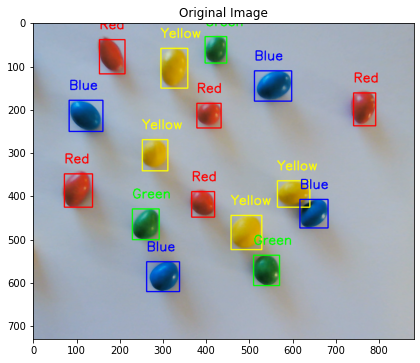

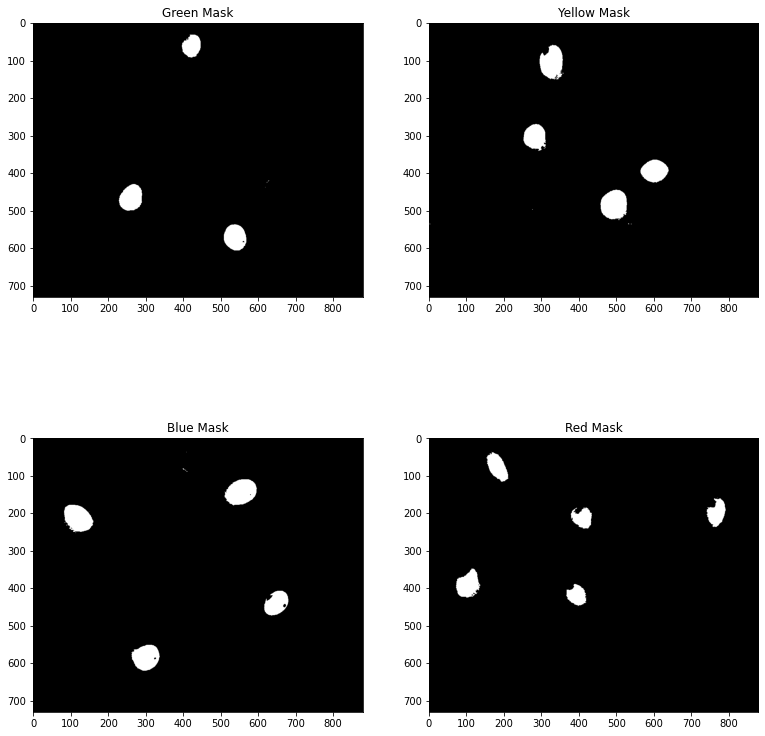

In [ ]:
image = glob.glob('/content/gdrive/Shareddrives/VC/img_calibrated_white/*.png') #List with all images

cont_yellow, cont_blue, cont_green, cont_red = [], [], [], [] #init vectors and var
no_yellow,no_blue, no_red, no_green = [], [], [], []
ye,g,b,r =0,0,0,0

for img in image: ##iterate between the images
  img = cv2.imread(img) ##read image

  roi = img[10:740, 500:1380] #define ROI

  img_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

  #Yellow range
  yellow_lower = np.array([20, 80, 40])
  yellow_upper = np.array([31, 255, 255])

  #Red range
  red_lower = np.array([0, 80, 50])
  red_upper = np.array([13, 255, 255]) 

  #Blue range
  blue_lower = np.array([95, 80, 40])
  blue_upper = np.array([120, 255, 255])

  #Green range
  green_lower = np.array([40, 70, 40])
  green_upper = np.array([88, 255, 255])

  
  ##Calc the mask of each collor we want and find the contours
  mask_yellow = cv2.inRange(img_hsv, yellow_lower, yellow_upper)
  contours_y, hierarchy_y = cv2.findContours(mask_yellow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
  cont_yellow.append(contours_y)

  mask_red = cv2.inRange(img_hsv, red_lower, red_upper)  
  contours_r, hierarchy_r = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
  cont_red.append(contours_r)

  mask_blue = cv2.inRange(img_hsv, blue_lower, blue_upper) 
  contours_b, hierarchy_b = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  cont_blue.append(contours_b)  

  mask_green = cv2.inRange(img_hsv, green_lower, green_upper)
  contours_g, hierarchy_g = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cont_green.append(contours_g)  

  #loop for each MM color
  for i in range(len(contours_y)):
    if (cv2.contourArea(contours_y[i]) < 100):
      continue
    else:
      ye = ye+1
      x,y,w,h = cv2.boundingRect(contours_y[i])
      roi = cv2.rectangle(roi,(x,y),(x+w,y+h),(0,255,255),2)
      cv2.putText(roi, "Yellow", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2)
      

  for i in range(len(contours_r)):
    if (cv2.contourArea(contours_r[i]) < 100):
      continue
    else:
      r = r+1
      x,y,w,h = cv2.boundingRect(contours_r[i])
      roi = cv2.rectangle(roi,(x,y),(x+w,y+h),(0,0,255),2)
      cv2.putText(roi, "Red", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
    

  for i in range(len(contours_b)):
    if (cv2.contourArea(contours_b[i]) < 100):
      continue
    else:
      b = b+1
      x,y,w,h = cv2.boundingRect(contours_b[i])
      roi = cv2.rectangle(roi,(x,y),(x+w,y+h),(255,0,0),2)
      cv2.putText(roi, "Blue", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)
   

  for i in range(len(contours_g)):
    if (cv2.contourArea(contours_g[i]) < 100):
      continue
    else:
      g = g+1
      x,y,w,h = cv2.boundingRect(contours_g[i])
      roi = cv2.rectangle(roi,(x,y),(x+w,y+h),(0,255,0),2)
      cv2.putText(roi, "Green", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)

  ##List with the values of the number of each MM color per image
  no_yellow.append(ye)
  no_green.append(g)
  no_blue.append(b)
  no_red.append(r)

  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
  
  #plot
  plt.figure(figsize=(15,16))
  plt.subplot(221), plt.imshow(roi), plt.title("Original Image")
  plt.figure(figsize=(13,14))
  plt.subplot(221), plt.imshow(mask_green,  cmap="gray"), plt.title("Green Mask")
  plt.subplot(222), plt.imshow(mask_yellow,  cmap="gray"),plt.title("Yellow Mask")
  plt.subplot(223), plt.imshow(mask_blue,  cmap="gray"),plt.title("Blue Mask")
  plt.subplot(224), plt.imshow(mask_red,  cmap="gray"), plt.title("Red Mask")


## **Exercise C - III**

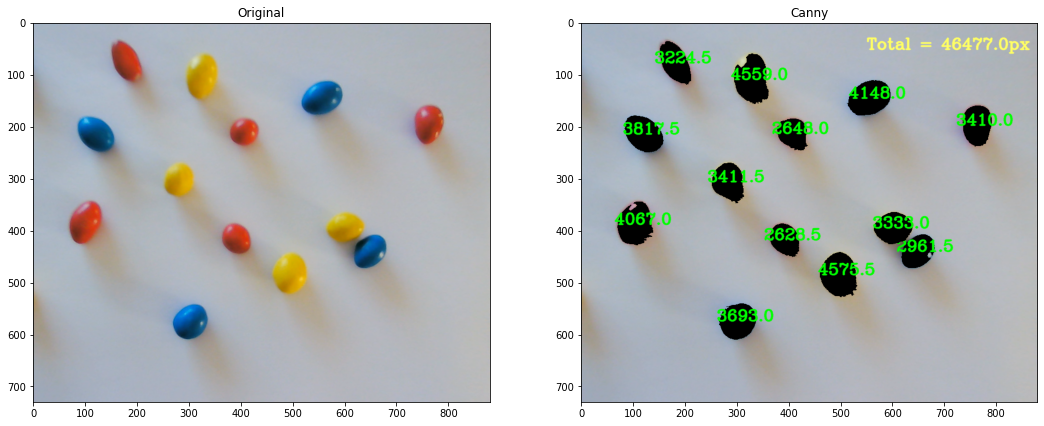

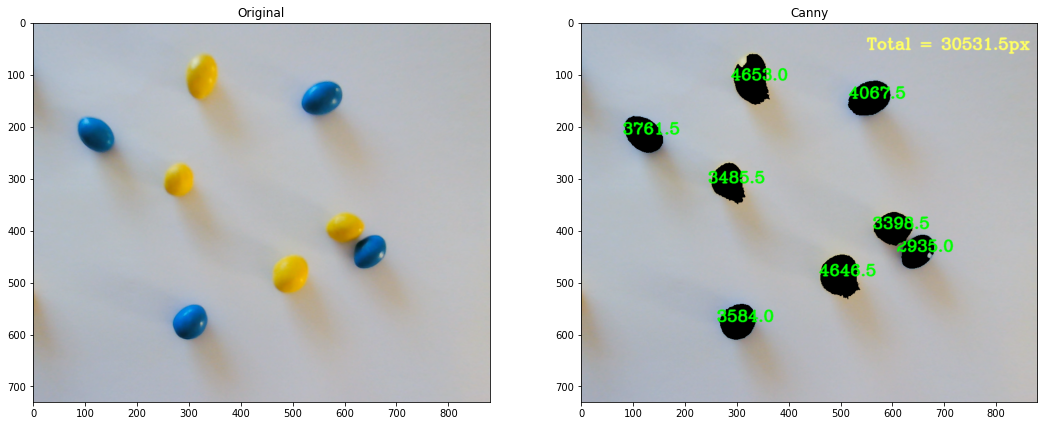

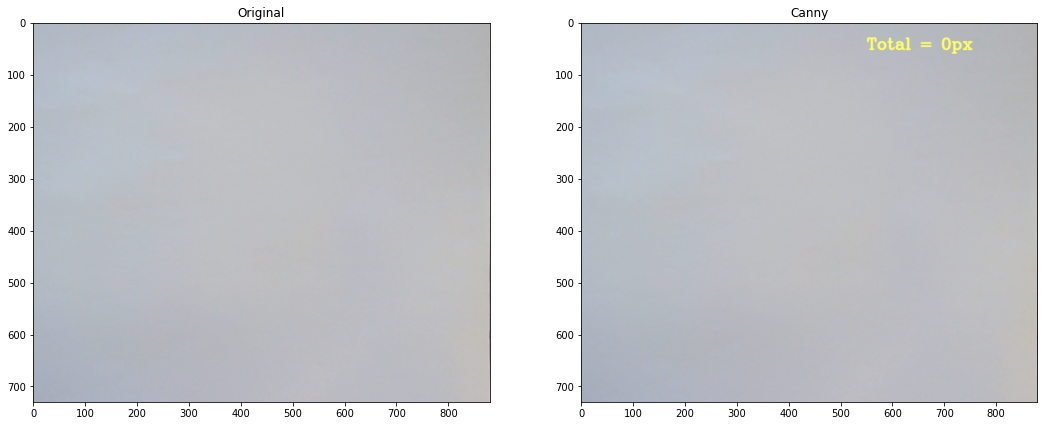

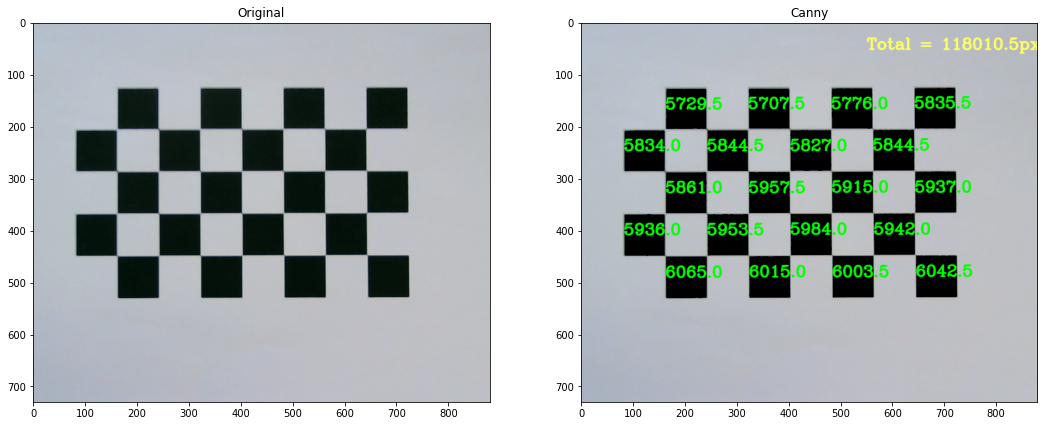

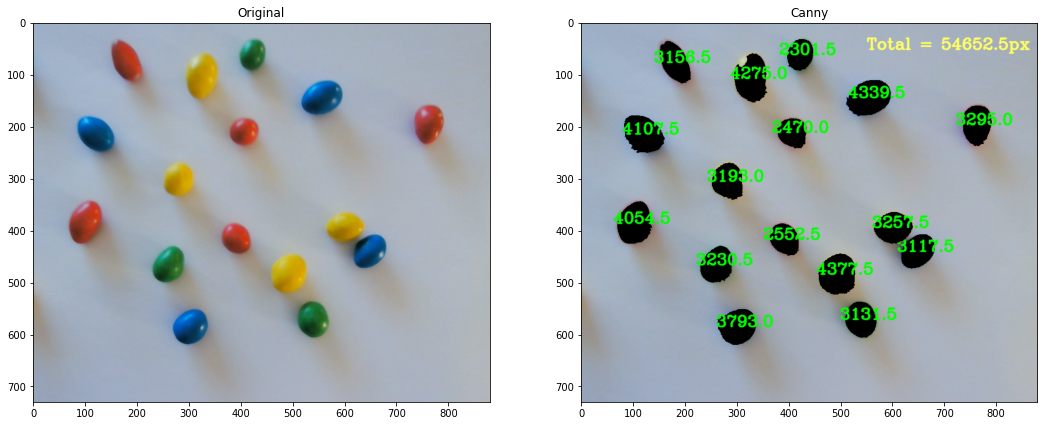

In [ ]:
image = glob.glob('/content/gdrive/Shareddrives/VC/img_calibrated_white/*.png')

areas = []

for img in image:
  img = cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img[10:740, 500:1380]
  a = img.copy()
  
  hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  lower = np.array([0, 80, 0])
  upper = np.array([255, 255, 255])

  mask = cv2.inRange(hsv, lower, upper)
  
  contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

  #calc of area in pixels for each image
  area = 0
  for i in contours:
      cnt = cv2.contourArea(i)
      if cnt > 900:  
          # Extract centroids
          M = cv2.moments(i)
          cX = int(M["m10"] / (M["m00"] + 0.00000001))
          cY = int(M["m01"] / (M["m00"] + 0.00000001))
          cv2.drawContours(img, [i], 0, (0,0,0), -1)
          cv2.putText(img,str(cnt) ,(cX-40,cY), cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,0),2,cv2.LINE_AA)
          area = area+cnt


  areas.append(area)
  cv2.putText(img,'Total = '+str(area) + 'px',(550,50), cv2.FONT_HERSHEY_COMPLEX, 1,(255,255,100),2,cv2.LINE_AA)

  

      
  plt.figure(figsize=(18,19))
  plt.subplot(221)
  plt.imshow(a)
  plt.title('Original')

  plt.subplot(222)
  plt.imshow(img, cmap = 'gray')
  plt.title('Canny')


## **Exercise C - IV, V**

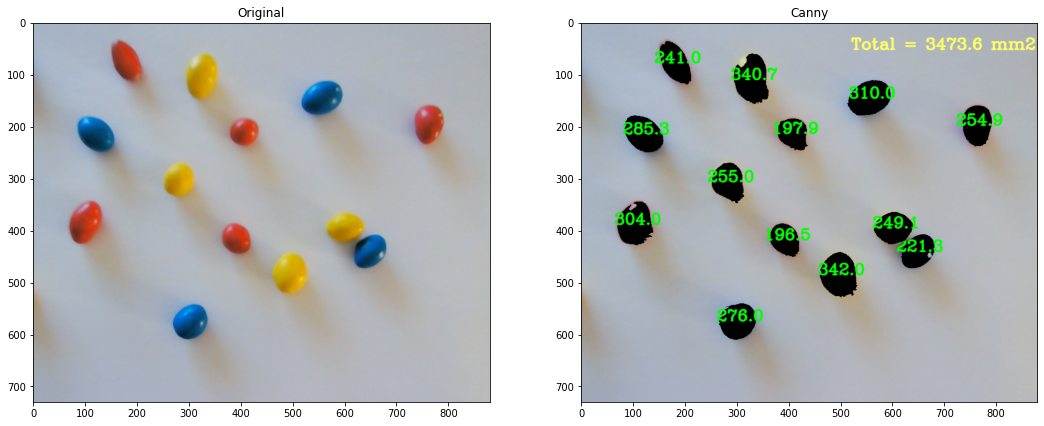

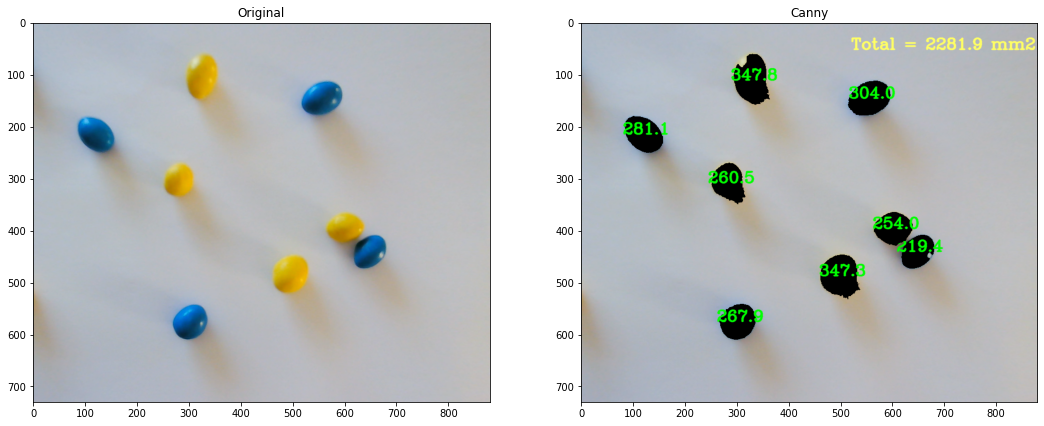

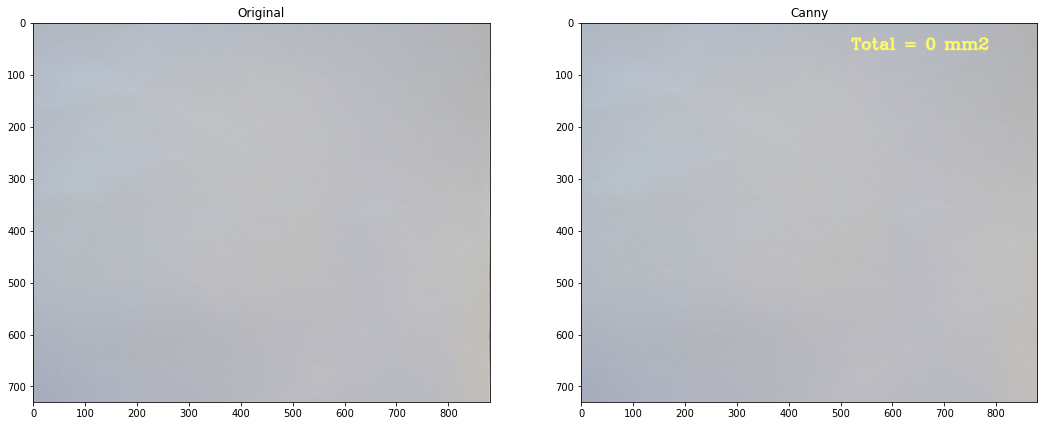

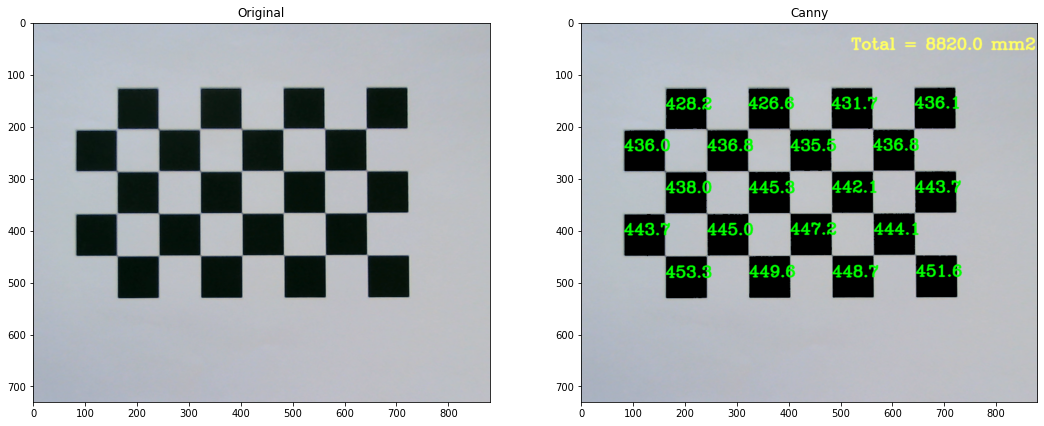

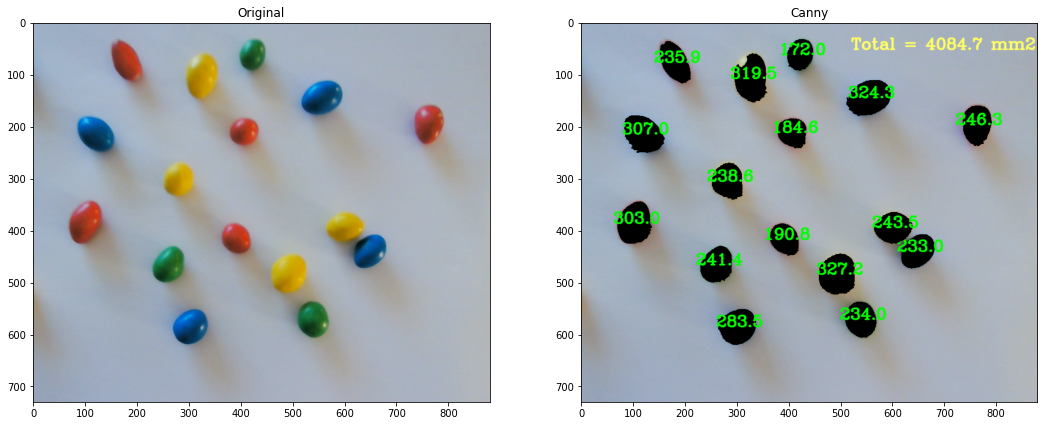

In [ ]:
image = glob.glob('/content/gdrive/Shareddrives/VC/img_calibrated_white/*.png')

#Area of chessboard
a = 4*5*0.021*0.021
#Convet pixeis to milimeters
pixel = a/areas[3]

for img in image:
  img = cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img[10:740, 500:1380]
  a = img.copy()
  
  hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  lower = np.array([0, 80, 0])
  upper = np.array([255, 255, 255])

  mask = cv2.inRange(hsv, lower, upper)
  
  contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

  area = 0
  for i in contours:
      cnt = cv2.contourArea(i)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          # Extract centroids
          M = cv2.moments(i)
          cX = int(M["m10"] / (M["m00"] + 0.00000001))
          cY = int(M["m01"] / (M["m00"] + 0.00000001))
          cv2.drawContours(img, [i], 0, (0,0,0), -1)
          cv2.putText(img,str(round(cnt,1)),(cX-40,cY), cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,0),2,cv2.LINE_AA)
          area = area+cnt


  areas.append(area)
  cv2.putText(img,'Total = '+str(round(area,1)) +' mm2',(520,50), cv2.FONT_HERSHEY_COMPLEX, 1,(255,255,100),2,cv2.LINE_AA)

  

      
  plt.figure(figsize=(18,19))
  plt.subplot(221)
  plt.imshow(a)
  plt.title('Original')

  plt.subplot(222)
  plt.imshow(img, cmap = 'gray')
  plt.title('Canny')

 


Fig 1
Nº Red: 5
Nº Blue: 4
Nº Green: 0
Nº Yellow: 4


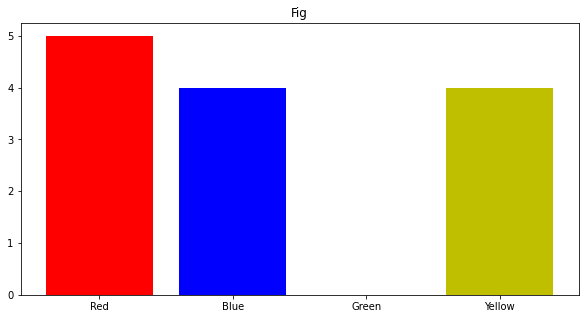

Fig 2
Nº Red: 5
Nº Blue: 8
Nº Green: 0
Nº Yellow: 8


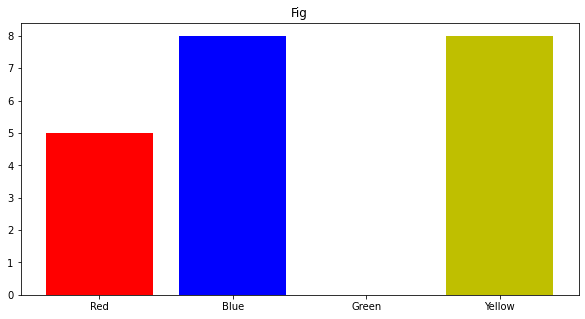

Fig 3
Nº Red: 5
Nº Blue: 8
Nº Green: 0
Nº Yellow: 8


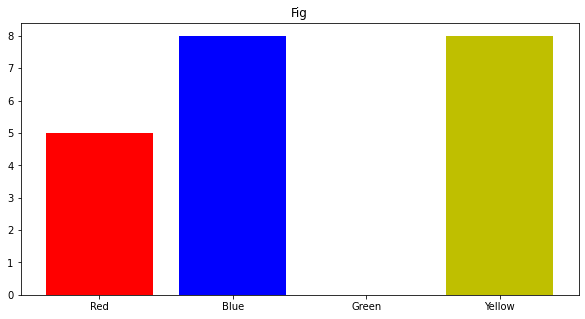

Fig 4
Nº Red: 5
Nº Blue: 8
Nº Green: 0
Nº Yellow: 8


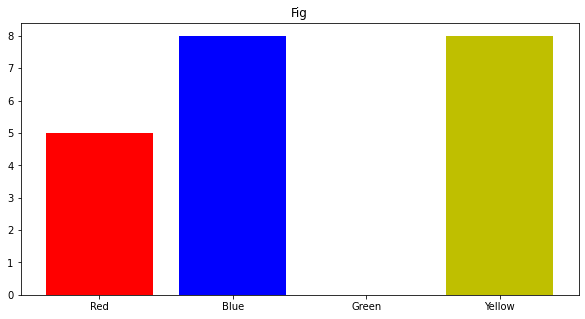

Fig 5
Nº Red: 10
Nº Blue: 12
Nº Green: 3
Nº Yellow: 12


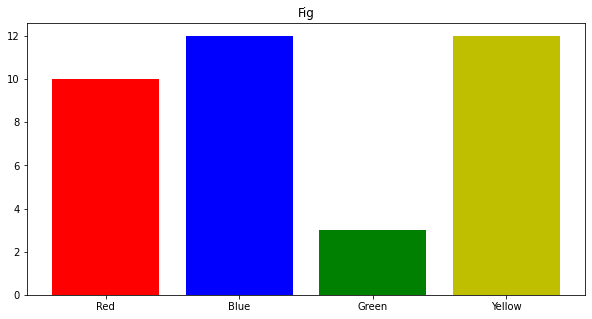

In [ ]:
#Number of mm's of each color
for i in range(len(no_yellow)):
  print("Fig", i+1)
  print("Nº Red:", no_red[i])
  print("Nº Blue:", no_blue[i])
  print("Nº Green:", no_green[i])
  print("Nº Yellow:", no_yellow[i])

  fig, axis = plt.subplots(figsize =(10, 5))
  plt.title("Fig")
  patches = axis.bar(['Red','Blue','Green','Yellow'],[no_red[i], no_blue[i], no_green[i], no_yellow[i]])
  patches[0].set_facecolor('r')
  patches[1].set_facecolor('b')
  patches[2].set_facecolor('g')
  patches[3].set_facecolor('y')

  plt.show()





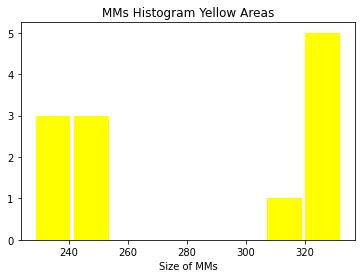

[332.51, 238.53, 232.77, 323.73, 320.97, 241.44, 245.67, 326.95, 325.45, 243.09, 228.25, 308.11]
AVG yellow:  280.62


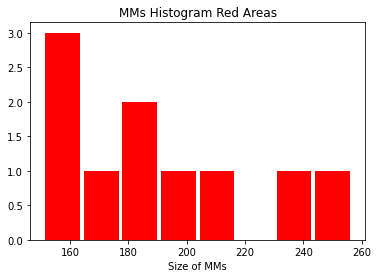

[162.11, 256.62, 167.49, 186.66, 210.2, 150.94, 240.25, 152.13, 177.99, 199.67]
AVG red:  190.41


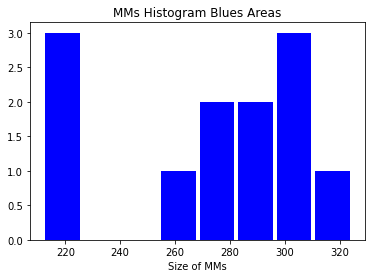

[276.01, 212.74, 285.32, 310.02, 267.86, 212.07, 281.13, 304.0, 283.49, 222.35, 306.99, 324.33]
AVG blue:  273.86


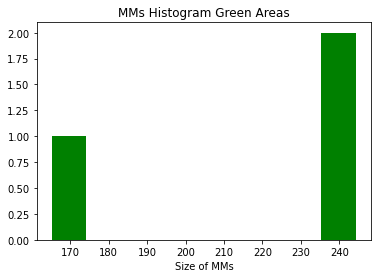

[238.6, 244.85, 164.73]
AVG green:  216.06


In [ ]:
image = glob.glob('/content/gdrive/Shareddrives/VC/img_calibrated_white/*.png') #List with all images

cont_yellow, cont_blue, cont_red, cont_green = [],[],[],[]
areas_yellow, areas_blue, areas_green, areas_red = [], [], [], [] #init vectors and var

for img in image: ##iterate between the images
  img = cv2.imread(img) ##read image

  roi = img[10:740, 500:1380] #define ROI

  img_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

  #Yellow range
  yellow_lower = np.array([20, 80, 40])
  yellow_upper = np.array([31, 255, 255])

  #Red range
  red_lower = np.array([0, 80, 50])
  red_upper = np.array([13, 255, 255]) 

  #Blue range
  blue_lower = np.array([95, 80, 40])
  blue_upper = np.array([120, 255, 255])

  #Green range
  green_lower = np.array([40, 70, 40])
  green_upper = np.array([88, 255, 255])

  
  ##Calc the mask of each collor we want and find the contours
  mask_yellow = cv2.inRange(img_hsv, yellow_lower, yellow_upper)
  contours_y, hierarchy_y = cv2.findContours(mask_yellow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
  cont_yellow.append(contours_y)

  mask_red = cv2.inRange(img_hsv, red_lower, red_upper)  
  contours_r, hierarchy_r = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
  cont_red.append(contours_r)

  mask_blue = cv2.inRange(img_hsv, blue_lower, blue_upper) 
  contours_b, hierarchy_b = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  cont_blue.append(contours_b)  

  mask_green = cv2.inRange(img_hsv, green_lower, green_upper)
  contours_g, hierarchy_g = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cont_green.append(contours_g)  

  #loop for each MM color
  for i, c in enumerate(contours_y):
    if (cv2.contourArea(contours_y[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_yellow.append(round(cnt,2))
      

  for i, c in enumerate(contours_r):
    if (cv2.contourArea(contours_r[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_red.append(round(cnt,2))
    

  for i, c in enumerate(contours_b):
    if (cv2.contourArea(contours_b[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_blue.append(round(cnt,2))
   

  for i, c in enumerate(contours_g):
    if (cv2.contourArea(contours_g[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_green.append(round(cnt,2))


plt.hist(areas_yellow,color="yellow", bins=8, rwidth= 0.9)
plt.title('MMs Histogram Yellow Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_yellow)
print("AVG yellow: ", round(np.average(areas_yellow),2))

plt.hist(areas_red, color="red" , bins=8, rwidth= 0.9)
plt.title('MMs Histogram Red Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_red)
print("AVG red: ", round(np.average(areas_red),2))

plt.hist(areas_blue, color="blue", bins=8, rwidth= 0.9)
plt.title('MMs Histogram Blues Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_blue)
print("AVG blue: ", round(np.average(areas_blue),2))

plt.hist(areas_green, color="green", bins=8, rwidth= 0.9)
plt.title('MMs Histogram Green Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_green)
print("AVG green: ",round( np.average(areas_green),2))

## **Exercise C - VI**

In [ ]:
#Ter mais cuidados com a iluminação (inclinação vertical) de forma a retirar algumas sombras
#Ao mesmo tempo, nao meter uma luz demasiado forma para haver pouco brilho captado nas imagens
#Ter maior preocupação com o fundo das fotos (fundo mais limpo e sem variações de cores)

## **Exercise D**

In [ ]:
img2undst = glob.glob('/content/GreyBackground/*.png')
i = 0
for img in img2undst:
  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

  img = cv2.imread(img)
  h,  w = img.shape[:2]
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

  # undistort
  dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
  # crop the image
  x, y, w, h = roi
  dst = dst[y:y+h, x:x+w]
  name = str(i)
  cv2.imwrite('/content/gdrive/Shareddrives/VC/img_calibrated_grey/' + name + '_calib_img.png', dst)
  i += 1

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(18,19))
  plt.subplot(221)
  plt.imshow(img)
  plt.title('Original')

  plt.subplot(222)
  plt.imshow(dst)
  plt.title('Undistorced')
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image = glob.glob('/content/gdrive/Shareddrives/VC/img_calibrated_grey/*.png')

cont_yellow, cont_blue, cont_green, cont_red, cont_brown = [], [], [], [], []
no_yellow,no_blue, no_red, no_green ,no_brown= [], [], [], [],[]
kernel_21 = np.ones((21, 21), 'uint8')
kernel_3 = np.ones((3, 3), 'uint8')
kernel_4 = np.ones((4, 4), 'uint8')
kernel_5 = np.ones((5, 5), 'uint8')
kernel_6 = np.ones((6, 6), 'uint8')
kernel_7 = np.ones((7, 7), 'uint8')
kernel_8 = np.ones((8, 8), 'uint8')
kernel_9 = np.ones((9, 9), 'uint8')
ye,g,b,r, br =0,0,0,0,0

for img in image:
  img = cv2.imread(img)
  #img = img[10:740, 450:1380]
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

 
  #Yellow range
  yellow_lower = np.array([20, 80, 40])
  yellow_upper = np.array([31, 255, 255])

  #Red range
  red_lower_1 = np.array([0, 100, 20])
  red_upper_1 = np.array([10, 255, 255])
  red_lower_2 = np.array([170, 100, 20])
  red_upper_2 = np.array([180, 255, 255])

  #Blue range
  blue_lower = np.array([95, 80, 40])
  blue_upper = np.array([120, 255, 255])

  #Green range
  green_lower = np.array([40, 70, 40])
  green_upper = np.array([88, 255, 255])

  #Brown
  brown_lower_1 = np.array([0,20,25])
  brown_upper_1 = np.array([40, 210, 80])
  brown_lower_2 = np.array([17,0,25])
  brown_upper_2 = np.array([25,200,120])
  #brown_lower_2 = np.array([170,10,25])
  #brown_upper_2 = np.array([255,90,100])
  #brown_lower = np.array([2, 125, 50], np.uint8)
  #brown_upper = np.array([12, 255, 80], np.uint8) #15, 255, 150



  
  


  mask_yellow = cv2.inRange(img_hsv, yellow_lower, yellow_upper)
  contours_y, hierarchy_y = cv2.findContours(mask_yellow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
  cont_yellow.append(contours_y)

   
  mask_red_1 = cv2.inRange(img_hsv, red_lower_1, red_upper_1)
  mask_red_2 = cv2.inRange(img_hsv, red_lower_2, red_upper_2)
  mask_red = mask_red_1 | mask_red_2 
  contours_r, hierarchy_r = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
  cont_red.append(contours_r)

  mask_blue = cv2.inRange(img_hsv, blue_lower, blue_upper)
  mask_blue = cv2.erode(mask_blue, kernel_9, iterations=2) 
  mask_blue = cv2.dilate(mask_blue, kernel_9, iterations=1)
  contours_b, hierarchy_b = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  cont_blue.append(contours_b)  


  mask_green = cv2.inRange(img_hsv, green_lower, green_upper)
  mask_green = cv2.erode(mask_green, kernel_5, iterations=2) 
  contours_g, hierarchy_g = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cont_green.append(contours_g)  


  mask_brown_1 = cv2.inRange(img_hsv, brown_lower_1, brown_upper_1)
  mask_brown_2 = cv2.inRange(img_hsv, brown_lower_2, brown_upper_2)
  mask_brown = mask_brown_1 | mask_brown_2
  #mask_brown = cv2.erode(mask_brown, kernel_4, iterations=1)
  #mask_brown = cv2.dilate(mask_brown, kernel_3, iterations=1)
  #mask_brown = cv2.erode(mask_brown, kernel_5, iterations=2)
  mask_brown = cv2.erode(mask_brown, kernel_3, iterations=1)
  mask_brown = cv2.dilate(mask_brown, kernel_21, iterations=2)
  contours_br, hierarchy_br = cv2.findContours(mask_brown, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cont_brown.append(contours_br)  

  
  

  for i in range(len(contours_y)):
    if (cv2.contourArea(contours_y[i]) < 1000):
      continue
    else:
      ye = ye+1
      x,y,w,h = cv2.boundingRect(contours_y[i])
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
      cv2.putText(img, "Yellow", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2)
      

  for i in range(len(contours_r)):
    if (cv2.contourArea(contours_r[i]) < 1000):
      continue
    else:
      r=r+1
      x,y,w,h = cv2.boundingRect(contours_r[i])
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
      cv2.putText(img, "Red", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
    

  for i in range(len(contours_b)):
    if (cv2.contourArea(contours_b[i]) < 1000):
      continue
    else:
      b = b+1
      x,y,w,h = cv2.boundingRect(contours_b[i])
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      cv2.putText(img, "Blue", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)
   

  for i in range(len(contours_g)):
    if (cv2.contourArea(contours_g[i]) < 1000):
      continue
    else:
      g = g+1
      x,y,w,h = cv2.boundingRect(contours_g[i])
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
      cv2.putText(img, "Green", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)


  for i in range(len(contours_br)):
    if (cv2.contourArea(contours_br[i]) < 1600 or cv2.contourArea(contours_br[i]) >  10000):
      continue
    else:
      br = br+1
      x,y,w,h = cv2.boundingRect(contours_br[i])
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(25, 28, 90),2)
      cv2.putText(img, "Brown", (x, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (25, 28, 90), 2)

   ##List with the values of the number of each MM color per image
  no_yellow.append(ye)
  no_green.append(g)
  no_blue.append(b)
  no_red.append(r)
  no_brown.append(br)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  plt.figure(figsize=(20,21))
  plt.subplot(221), plt.imshow(img), plt.title("Original Image")
  plt.figure(figsize=(20,21))
  plt.subplot(221), plt.imshow(mask_green,  cmap="gray"), plt.title("Green Mask")
  plt.subplot(222), plt.imshow(mask_yellow,  cmap="gray"),plt.title("Yellow Mask")
  plt.figure(figsize=(20,21))
  plt.subplot(221), plt.imshow(mask_blue,  cmap="gray"),plt.title("Blue Mask")
  plt.subplot(222), plt.imshow(mask_red,  cmap="gray"), plt.title("Red Mask")
  plt.figure(figsize=(20,21))
  plt.subplot(221), plt.imshow(mask_brown,  cmap="gray"), plt.title("Brown Mask")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image = glob.glob('/content/gdrive/Shareddrives/VC/img_calibrated_grey/*.png')

areas = []

for img in image:
  img = cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #img = img[10:740, 450:1380]
  a = img.copy()
  
  hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  lower = np.array([0, 70, 0])
  upper = np.array([255, 255, 255])

  mask = cv2.inRange(hsv, lower, upper)
  
  contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

  #calc of area in pixels for each image
  area = 0
  for i in contours:
      cnt = cv2.contourArea(i)
      if cnt > 900:  
          # Extract centroids
          M = cv2.moments(i)
          cX = int(M["m10"] / (M["m00"] + 0.00000001))
          cY = int(M["m01"] / (M["m00"] + 0.00000001))
          cv2.drawContours(img, [i], 0, (0,0,0), -1)
          cv2.putText(img,str(cnt) ,(cX-40,cY), cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,0),2,cv2.LINE_AA)
          area = area+cnt


  areas.append(area)
  cv2.putText(img,'Total = '+str(area) + 'px',(550,50), cv2.FONT_HERSHEY_COMPLEX, 1,(255,255,100),2,cv2.LINE_AA)

  

      
  plt.figure(figsize=(18,19))
  plt.subplot(221)
  plt.imshow(a)
  plt.title('Original')

  plt.subplot(222)
  plt.imshow(img, cmap = 'gray')
  plt.title('Canny')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image = glob.glob('/content/gdrive/Shareddrives/VC/img_calibrated_grey/*.png')

#Area of chessboard
a = 4*5*0.021*0.021
#Convet pixeis to milimeters
pixel = a/areas[0]

for img in image:
  img = cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img[10:740, 450:1380]
  a = img.copy()
  
  hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  lower = np.array([0, 75, 0])
  upper = np.array([255, 255, 255])

  mask = cv2.inRange(hsv, lower, upper)
  
  contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

  area = 0
  for i in contours:
      cnt = cv2.contourArea(i)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          # Extract centroids
          M = cv2.moments(i)
          cX = int(M["m10"] / (M["m00"] + 0.00000001))
          cY = int(M["m01"] / (M["m00"] + 0.00000001))
          cv2.drawContours(img, [i], 0, (0,0,0), -1)
          cv2.putText(img,str(round(cnt,1)),(cX-40,cY), cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,0),2,cv2.LINE_AA)
          area = area+cnt


  areas.append(area)
  cv2.putText(img,'Total = '+str(round(area,1)) +' mm2',(520,50), cv2.FONT_HERSHEY_COMPLEX, 1,(255,255,100),2,cv2.LINE_AA)

  

      
  plt.figure(figsize=(18,19))
  plt.subplot(221)
  plt.imshow(a)
  plt.title('Original')

  plt.subplot(222)
  plt.imshow(img, cmap = 'gray')
  plt.title('Canny')

Output hidden; open in https://colab.research.google.com to view.

Fig 1
Nº Red: 0
Nº Blue: 7
Nº Green: 3
Nº Yellow: 5
Nº Brown: 0


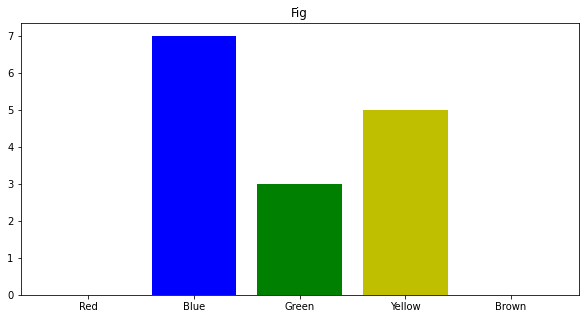

Fig 2
Nº Red: 0
Nº Blue: 14
Nº Green: 3
Nº Yellow: 10
Nº Brown: 2


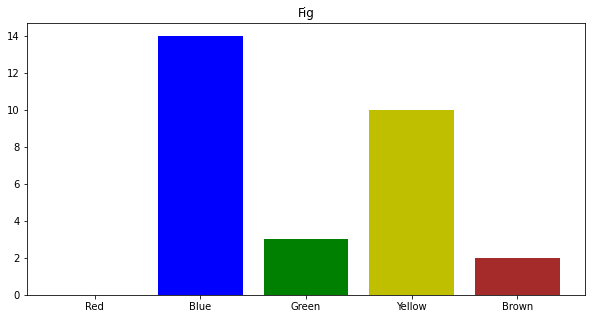

Fig 3
Nº Red: 4
Nº Blue: 20
Nº Green: 6
Nº Yellow: 14
Nº Brown: 11


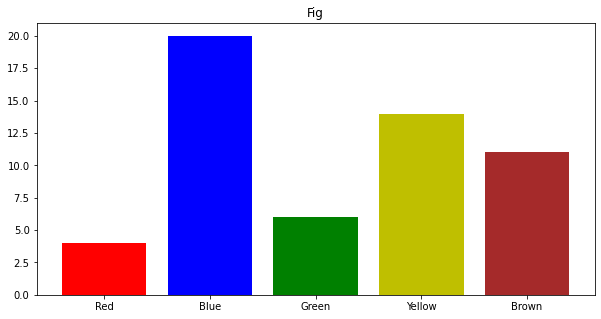

Fig 4
Nº Red: 4
Nº Blue: 20
Nº Green: 6
Nº Yellow: 14
Nº Brown: 11


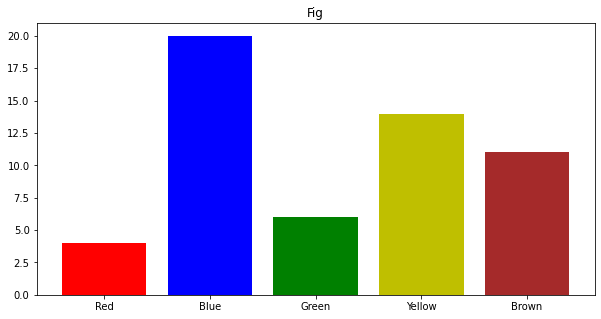

Fig 5
Nº Red: 9
Nº Blue: 27
Nº Green: 9
Nº Yellow: 19
Nº Brown: 16


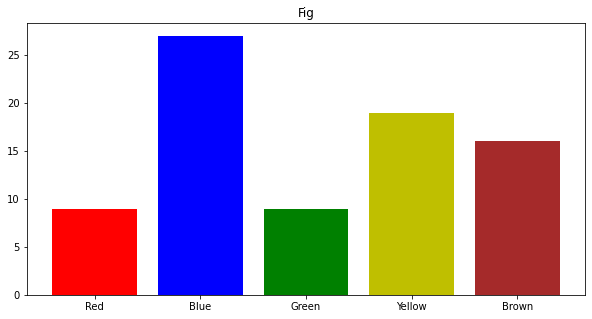

Fig 6
Nº Red: 9
Nº Blue: 27
Nº Green: 9
Nº Yellow: 19
Nº Brown: 18


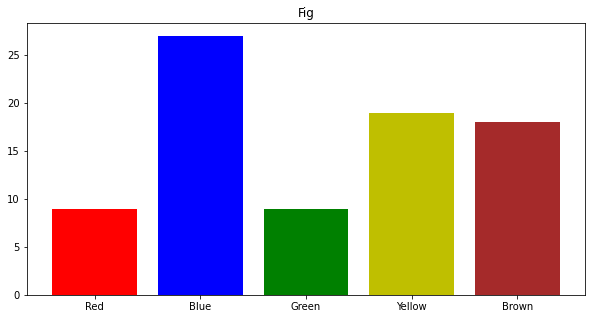

Fig 7
Nº Red: 14
Nº Blue: 34
Nº Green: 12
Nº Yellow: 24
Nº Brown: 31


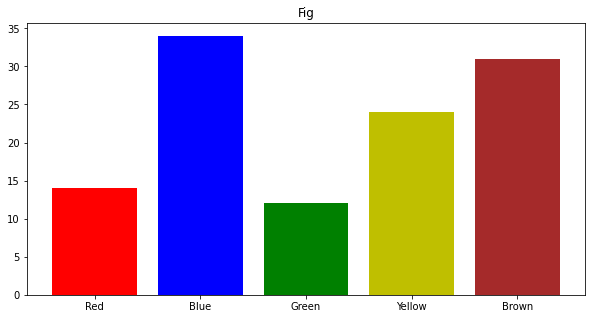

In [ ]:
#Number of mm's of each color
for i in range(len(no_yellow)):
  print("Fig", i+1)
  print("Nº Red:", no_red[i])
  print("Nº Blue:", no_blue[i])
  print("Nº Green:", no_green[i])
  print("Nº Yellow:", no_yellow[i])
  print("Nº Brown:", no_brown[i])
  fig, axis = plt.subplots(figsize =(10, 5))
  plt.title("Fig")
  patches = axis.bar(['Red','Blue','Green','Yellow', 'Brown'],[no_red[i], no_blue[i], no_green[i], no_yellow[i], no_brown[i]])
  patches[0].set_facecolor('r')
  patches[1].set_facecolor('b')
  patches[2].set_facecolor('g')
  patches[3].set_facecolor('y')
  patches[4].set_facecolor('brown')
  plt.show()


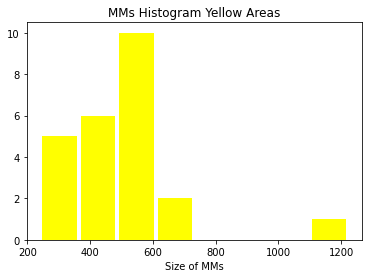

[438.42, 305.51, 383.38, 273.54, 553.46, 421.89, 572.75, 556.53, 399.84, 645.27, 486.53, 512.83, 602.75, 1222.9, 250.31, 417.16, 358.03, 240.63, 474.64, 496.53, 592.75, 579.13, 519.76, 646.21]
AVG yellow:  497.95


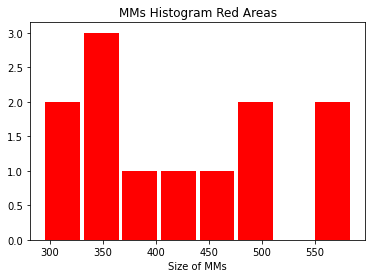

[585.11, 476.37, 354.01, 321.65, 508.97, 400.71, 359.13, 294.01, 568.34, 450.78, 432.44, 333.86]
AVG red:  423.78


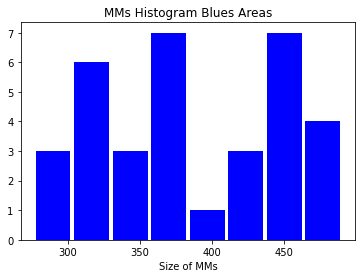

[339.21, 320.94, 299.52, 399.21, 440.15, 329.05, 445.35, 380.94, 363.54, 331.57, 472.52, 490.47, 364.33, 479.44, 380.63, 345.43, 363.86, 419.13, 414.09, 451.73, 309.76, 377.48, 317.01, 439.52, 460.47, 276.61, 470.15, 321.57, 366.53, 318.97, 437.0, 451.57, 299.52, 453.78]
AVG blue:  386.21


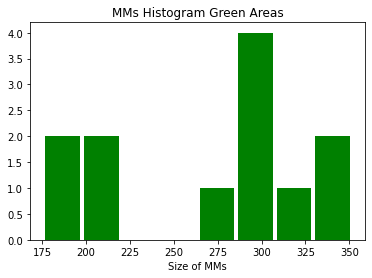

[295.9, 292.52, 191.89, 303.23, 175.75, 345.51, 281.1, 320.63, 201.18, 306.45, 351.34, 199.68]
AVG green:  272.1


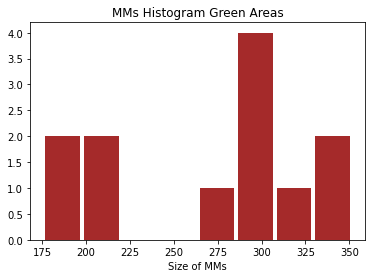

[295.9, 292.52, 191.89, 303.23, 175.75, 345.51, 281.1, 320.63, 201.18, 306.45, 351.34, 199.68]
AVG brown:  540.59


In [ ]:
image = glob.glob('/content/gdrive/Shareddrives/VC/img_calibrated_grey/*.png') #List with all images

cont_yellow, cont_blue, cont_red, cont_green, cont_brown = [],[],[],[],[]
areas_yellow, areas_blue, areas_green, areas_red, areas_br = [], [], [], [],[] #init vectors and var

kernel_21 = np.ones((21, 21), 'uint8')
kernel_5 = np.ones((5, 5), 'uint8')
kernel_9 = np.ones((9, 9), 'uint8')
ye,g,b,r, br =0,0,0,0,0

for img in image:
  img = cv2.imread(img)
  img = img[10:740, 450:1380]
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

 
  #Yellow range
  yellow_lower = np.array([20, 80, 40])
  yellow_upper = np.array([31, 255, 255])

  #Red range
  red_lower_1 = np.array([0, 100, 20])
  red_upper_1 = np.array([10, 255, 255])
  red_lower_2 = np.array([170, 100, 20])
  red_upper_2 = np.array([180, 255, 255])

  #Blue range
  blue_lower = np.array([95, 80, 40])
  blue_upper = np.array([120, 255, 255])

  #Green range
  green_lower = np.array([40, 70, 40])
  green_upper = np.array([88, 255, 255])

  #Brown
  brown_lower_1 = np.array([0,40,25])
  brown_upper_1 = np.array([20, 255, 200])

  
  


  mask_yellow = cv2.inRange(img_hsv, yellow_lower, yellow_upper)
  contours_y, hierarchy_y = cv2.findContours(mask_yellow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
  cont_yellow.append(contours_y)

   
  mask_red_1 = cv2.inRange(img_hsv, red_lower_1, red_upper_1)
  mask_red_2 = cv2.inRange(img_hsv, red_lower_2, red_upper_2)
  mask_red = mask_red_1 | mask_red_2 
  contours_r, hierarchy_r = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
  cont_red.append(contours_r)

  mask_blue = cv2.inRange(img_hsv, blue_lower, blue_upper)
  mask_blue = cv2.erode(mask_blue, kernel_9, iterations=2) 
  mask_blue = cv2.dilate(mask_blue, kernel_9, iterations=1)
  contours_b, hierarchy_b = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  cont_blue.append(contours_b)  


  mask_green = cv2.inRange(img_hsv, green_lower, green_upper)
  mask_green = cv2.erode(mask_green, kernel_5, iterations=2) 
  contours_g, hierarchy_g = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cont_green.append(contours_g)  


  mask_brown = cv2.inRange(img_hsv, brown_lower_1, brown_upper_1)
  mask_brown = cv2.erode(mask_brown, kernel_5, iterations=2)
  mask_brown = cv2.dilate(mask_brown, kernel_21, iterations=2)
  contours_br, hierarchy_br = cv2.findContours(mask_brown, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cont_brown.append(contours_br)  


  #loop for each MM color
  for i, c in enumerate(contours_y):
    if (cv2.contourArea(contours_y[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_yellow.append(round(cnt,2))
      

  for i, c in enumerate(contours_r):
    if (cv2.contourArea(contours_r[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_red.append(round(cnt,2))
    

  for i, c in enumerate(contours_b):
    if (cv2.contourArea(contours_b[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_blue.append(round(cnt,2))
   

  for i, c in enumerate(contours_g):
    if (cv2.contourArea(contours_g[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_green.append(round(cnt,2))
  
  for i, c in enumerate(contours_br):
    if (cv2.contourArea(contours_br[i]) < 100):
      continue
    else:
      cnt = cv2.contourArea(c)
      if cnt > 900:  
          cnt = cnt * pixel * 1000000
          areas_br.append(round(cnt,2))

  


plt.hist(areas_yellow,color="yellow", bins=8, rwidth= 0.9)
plt.title('MMs Histogram Yellow Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_yellow)
print("AVG yellow: ", round(np.average(areas_yellow),2))

plt.hist(areas_red, color="red" , bins=8, rwidth= 0.9)
plt.title('MMs Histogram Red Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_red)
print("AVG red: ", round(np.average(areas_red),2))

plt.hist(areas_blue, color="blue", bins=8, rwidth= 0.9)
plt.title('MMs Histogram Blues Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_blue)
print("AVG blue: ", round(np.average(areas_blue),2))

plt.hist(areas_green, color="green", bins=8, rwidth= 0.9)
plt.title('MMs Histogram Green Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_green)
print("AVG green: ",round( np.average(areas_green),2))

plt.hist(areas_green, color="brown", bins=8, rwidth= 0.9)
plt.title('MMs Histogram Green Areas')
plt.xlabel("Size of MMs")
plt.show()
print(areas_green)
print("AVG brown: ",round( np.average(areas_br),2))

In [ ]:
#Recomendações iguais as dadas para o fundo branco
#porém com a adição de recomendar que cada MM tenha uma maior distancia entre eles na foto 